In [ ]:
#import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
hr_data = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')

# Identify and treat the missing and illogical values.

In [ ]:
hr_data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [ ]:
#print number of variables and entries in the data
print("There are", hr_data.shape[1],"variables and",hr_data.shape[0],"entries in the data")
#check for missing values
print("Number of missing values for every variables:")
print(hr_data.isnull().sum())

There are 35 variables and 1470 entries in the data
Number of missing values for every variables:
Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
Wo

In [ ]:
#check for duplicate values
hr_data.duplicated().sum()

0

In [ ]:
hr_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

# Explore the relationship between the explanatory variables and the target variables.

In [ ]:
#get Categorical variable names
categorical_names = hr_data.select_dtypes(include=[np.object]).columns.tolist()
categorical_names

['Attrition',
 'BusinessTravel',
 'Department',
 'EducationField',
 'Gender',
 'JobRole',
 'MaritalStatus',
 'Over18',
 'OverTime']

In [ ]:
def generate_Categorical_variable_graph(var_name):
    temp_df = hr_data.groupby(var_name)['Attrition'].value_counts(normalize=True)
    temp_df = temp_df.mul(100).rename('Percent').reset_index()
    plt = sns.catplot(x=var_name, y='Percent', hue="Attrition", kind='bar', data=temp_df, palette="pastel")
    plt.ax.set_ylim(0,100)
    plt.ax.set_xticklabels(plt.ax.get_xticklabels(), rotation=20, ha="right")
    
    for p in plt.ax.patches:
        txt = str(p.get_height().round(1)) + '%'
        txt_x = p.get_x()
        txt_y = p.get_height()+2
        plt.ax.text(txt_x,txt_y,txt)
     
    

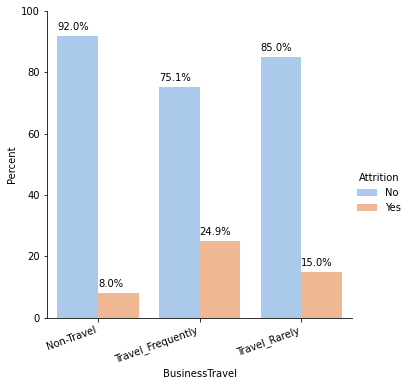

In [ ]:
generate_Categorical_variable_graph('BusinessTravel')

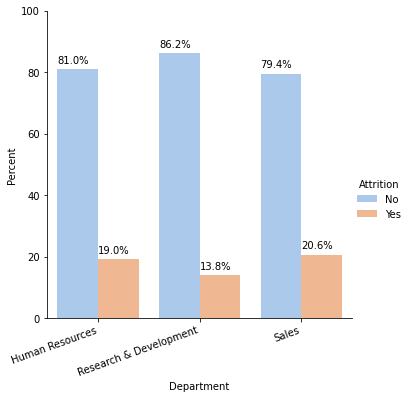

In [ ]:
generate_Categorical_variable_graph('Department')

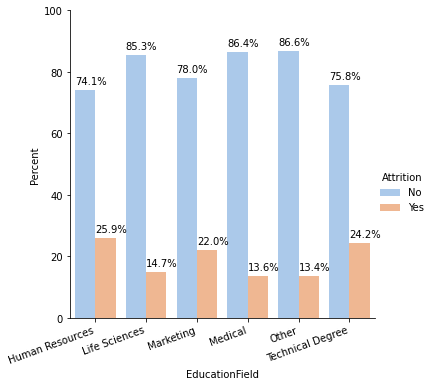

In [ ]:
generate_Categorical_variable_graph('EducationField')

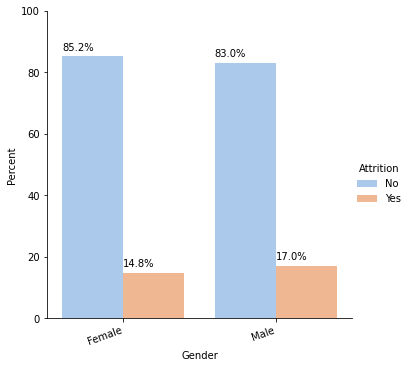

In [ ]:
generate_Categorical_variable_graph('Gender')

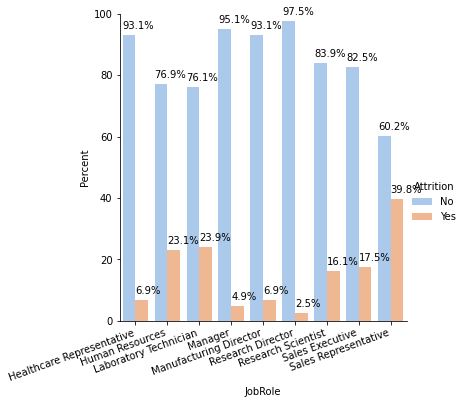

In [ ]:
generate_Categorical_variable_graph('JobRole')

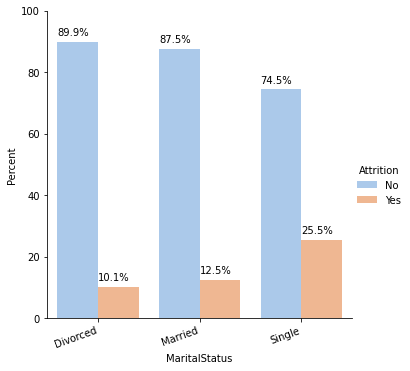

In [ ]:
generate_Categorical_variable_graph('MaritalStatus')

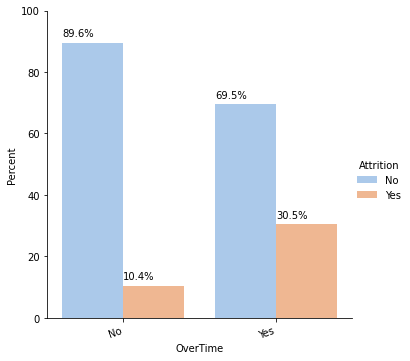

In [ ]:
generate_Categorical_variable_graph('OverTime')

In [ ]:
#get  Numerical variable names
Numerical_names = hr_data.select_dtypes([np.number]).columns.tolist()
Numerical_names

['Age',
 'DailyRate',
 'DistanceFromHome',
 'Education',
 'EmployeeCount',
 'EmployeeNumber',
 'EnvironmentSatisfaction',
 'HourlyRate',
 'JobInvolvement',
 'JobLevel',
 'JobSatisfaction',
 'MonthlyIncome',
 'MonthlyRate',
 'NumCompaniesWorked',
 'PercentSalaryHike',
 'PerformanceRating',
 'RelationshipSatisfaction',
 'StandardHours',
 'StockOptionLevel',
 'TotalWorkingYears',
 'TrainingTimesLastYear',
 'WorkLifeBalance',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager']

array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'DailyRate'}>,
        <AxesSubplot:title={'center':'DistanceFromHome'}>,
        <AxesSubplot:title={'center':'Education'}>],
       [<AxesSubplot:title={'center':'EmployeeCount'}>,
        <AxesSubplot:title={'center':'EmployeeNumber'}>,
        <AxesSubplot:title={'center':'EnvironmentSatisfaction'}>,
        <AxesSubplot:title={'center':'HourlyRate'}>],
       [<AxesSubplot:title={'center':'JobInvolvement'}>,
        <AxesSubplot:title={'center':'JobLevel'}>,
        <AxesSubplot:title={'center':'JobSatisfaction'}>,
        <AxesSubplot:title={'center':'MonthlyIncome'}>],
       [<AxesSubplot:title={'center':'MonthlyRate'}>,
        <AxesSubplot:title={'center':'NumCompaniesWorked'}>,
        <AxesSubplot:title={'center':'PercentSalaryHike'}>,
        <AxesSubplot:title={'center':'PerformanceRating'}>],
       [<AxesSubplot:title={'center':'RelationshipSatisfaction'}>,
        <AxesSubplot:title={'ce

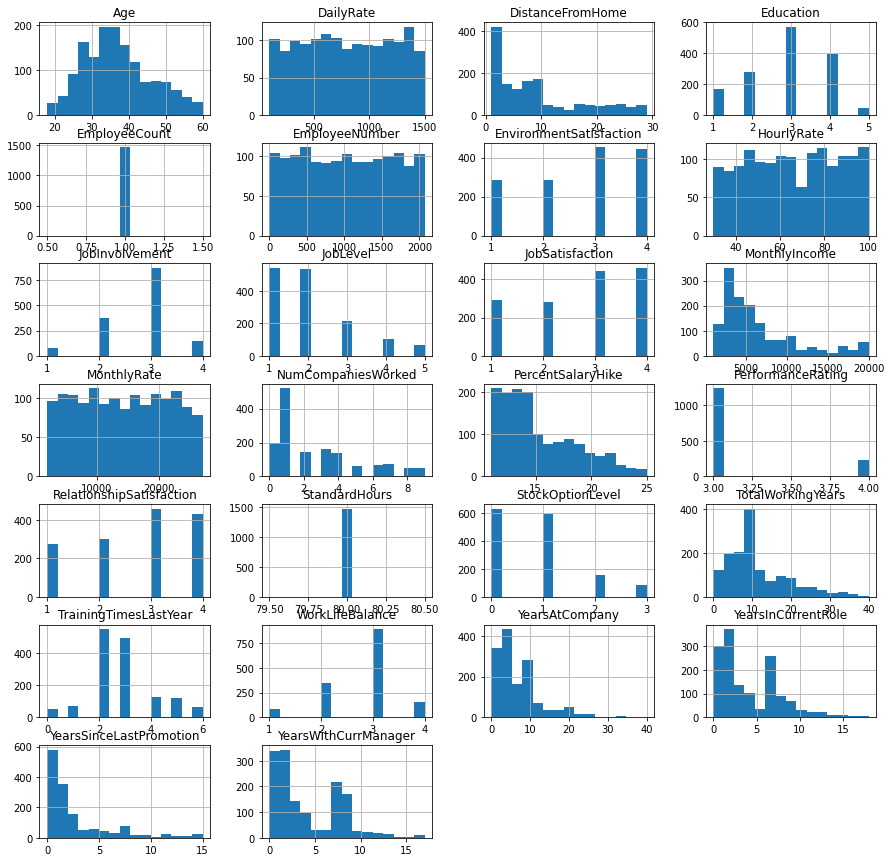

In [ ]:
hr_data[Numerical_names].hist(bins=15, figsize=(15, 15), layout=(7, 4))

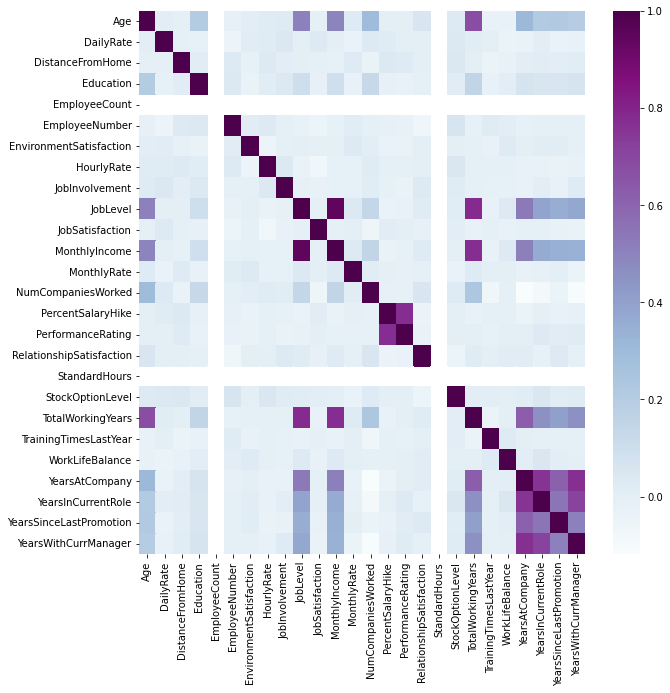

In [ ]:
#correlation matrix
fig, ax = plt.subplots(figsize=(10,10)) 
sns.heatmap(hr_data.corr(), ax=ax, cmap="BuPu")
plt.savefig("Plotting_Correlation_HeatMap.jpg")

Observation from above matrix

Most of the values are less related to each other

Hourly rate, daily rate, and monthly rate are unrealted with eachother which is invalid so we will consider monthlyIncome for the model because it is most related with job level

TotalWorkingYears is more related to Job Level which indicates that you can achive higher job level if you work longer in the company

Number of companies an employee have worked at is less related with the TotalWorkingYears which indecates that he/she might leave

Perfomance rating is heighly related with percentsalaryhike that means one can get more salary hike with higher perfomance rating



# Study Target Data

In [ ]:
# Reassign target
hr_data.Attrition.replace(to_replace = dict(Yes = 1, No = 0), inplace = True)
hr_data.head()

NameError: ignored

In [ ]:
freq_Attrition = hr_data['Attrition'].value_counts()
freq_Attrition.plot.pie(explode=[0.05, 0.1], labels=['No', 'Yes'], autopct='%1.2f%%',  shadow=True)

Here we can see that the target variable is imbalanced which is not good for the training model so we have to balance the train data

# Explore the feature selection and dimensionality reduction.

In [ ]:
#numerical features description
dataframe=hr_data.describe()
print(dataframe)
smalldata = dataframe[["EmployeeCount","EmployeeNumber","StandardHours"]]

print(smalldata)
#import dataframe_image as dfi
#dfi.export(smalldata, 'dataframe1.png')

               Age    Attrition    DailyRate  DistanceFromHome    Education  \
count  1470.000000  1470.000000  1470.000000       1470.000000  1470.000000   
mean     36.923810     0.161224   802.485714          9.192517     2.912925   
std       9.135373     0.367863   403.509100          8.106864     1.024165   
min      18.000000     0.000000   102.000000          1.000000     1.000000   
25%      30.000000     0.000000   465.000000          2.000000     2.000000   
50%      36.000000     0.000000   802.000000          7.000000     3.000000   
75%      43.000000     0.000000  1157.000000         14.000000     4.000000   
max      60.000000     1.000000  1499.000000         29.000000     5.000000   

       EmployeeCount  EmployeeNumber  EnvironmentSatisfaction   HourlyRate  \
count         1470.0     1470.000000              1470.000000  1470.000000   
mean             1.0     1024.865306                 2.721769    65.891156   
std              0.0      602.024335                 1

Here, as we observe The __EmployeeConut__ have only one value(1) that will not help in the prediction model so we can remove this variable

__EmployeeNumber__ repersents unique identity of the employee that doesn't have any significance in the attrition so we can also remove this variable

__StandardHours__ also has only one value(80) so we can also remove this variable

In [ ]:
hr_data.describe()#categorical features description
hr_data.describe(include=[np.object])
#dfi.export(hr_data.describe(include=[np.object]), 'dataframe2.png')

,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
count,1470,1470,1470,1470,1470,1470,1470,1470
unique,3,3,6,2,9,3,1,2
top,Travel_Rarely,Research & Development,Life Sciences,Male,Sales Executive,Married,Y,No
freq,1043,961,606,882,326,673,1470,1054


__over18__ has only one unique value that means all the employees are over the age of 18 and it doesn't help to build the model so we can remove this variable

In [ ]:
#Remove useless features
hr_data.drop( ['DailyRate','EmployeeNumber', 'EmployeeCount','HourlyRate','MonthlyRate', 'Over18', 'StandardHours'] , axis = 1, inplace = True )
print(hr_data.shape)


(1470, 28)


# Modeling

Encode the categorical data into numerical as skitlearn takes only numerical values.

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import imblearn

In [ ]:
categorical_names = hr_data.select_dtypes(include=[np.object]).columns.tolist()
categorical_names

['BusinessTravel',
 'Department',
 'EducationField',
 'Gender',
 'JobRole',
 'MaritalStatus',
 'OverTime']

In [ ]:
hr_data["BusinessTravel"] = LabelEncoder().fit_transform(hr_data['BusinessTravel'])
hr_data["Department"] = LabelEncoder().fit_transform(hr_data['Department'])
hr_data["EducationField"] = LabelEncoder().fit_transform(hr_data['EducationField'])
hr_data["Gender"] = LabelEncoder().fit_transform(hr_data['Gender'])
hr_data["JobRole"] = LabelEncoder().fit_transform(hr_data['JobRole'])
hr_data["MaritalStatus"] = LabelEncoder().fit_transform(hr_data['MaritalStatus'])
hr_data["OverTime"] = LabelEncoder().fit_transform(hr_data['OverTime'])
hr_data.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,2,1,2,1,2,0,3,...,3,1,0,8,0,1,6,4,0,5
1,49,0,1,1,8,1,1,3,1,2,...,4,4,1,10,3,3,10,7,1,7
2,37,1,2,1,2,2,4,4,1,2,...,3,2,0,7,3,3,0,0,0,0
3,33,0,1,1,3,4,1,4,0,3,...,3,3,0,8,3,3,8,7,3,0
4,27,0,2,1,2,1,3,1,1,3,...,3,4,1,6,3,3,2,2,2,2


As we already know that target variable is imbalanced so we have to use Synthetic Minority Oversampling Technique (SMOTE)
https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/#:~:text=This%20procedure%20can%20be%20used,to%20balance%20the%20class%20distribution.

In [ ]:
columns = list(hr_data.columns)
columns.remove("Attrition")
oversampling = imblearn.over_sampling.SMOTE()
Resampled,target = oversampling.fit_resample(hr_data[columns],hr_data["Attrition"])

In [ ]:
Resampled['Attrition']=target
Resampled.head()
print(Resampled.shape)

(2466, 28)


<AxesSubplot:ylabel='Attrition'>

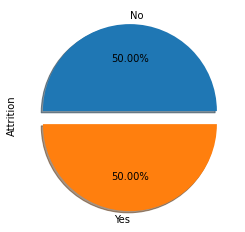

In [ ]:
freq_Attrition = Resampled['Attrition'].value_counts()
freq_Attrition.plot.pie(explode=[0.05, 0.1], labels=['No', 'Yes'], autopct='%1.2f%%',  shadow=True)

Split data into train and test dataset

In [ ]:
hr_X_train, hr_X_test, hr_Y_train, hr_Y_test = train_test_split(Resampled, target,test_size= 0.30, random_state=60);
print( len(hr_X_train), "train set  and ", len(hr_X_test), "validation set")

1726 train set  and  740 validation set


In [ ]:
from sklearn.naive_bayes import MultinomialNB

from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import SelectFromModel
from sklearn.neighbors import KNeighborsClassifier 
import warnings
warnings.filterwarnings('ignore')

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix,roc_curve, roc_auc_score, f1_score,precision_recall_curve,ConfusionMatrixDisplay

In [ ]:
def model_evaluation(model , X_train , y_train , X_test , y_test):

    model.fit(X_train , y_train)
    y_pred = model.predict(X_train)

    y_train_pred = model.predict(X_train)               # Finding the positives and negatives 
    y_train_prob = model.predict_proba(X_train)[:,1]    # we are intersted only in the second column


    #overall acc of train model    
    model_conf_matrix = confusion_matrix(y_train,y_train_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=model_conf_matrix,display_labels=["0","1"])
    
    TP = model_conf_matrix[1][1]; TN = model_conf_matrix[0][0]; 
    FP = model_conf_matrix[0][1]; FN = model_conf_matrix[1][0];
    sensitivity = TP / float(TP + FN) * 100.0; specificity = TN / float(TN + FP) * 100.0;
    precision = TP / float(TP + FP) * 100.0;   
    
    print('Confusion matrix - Train :', '\n',model_conf_matrix)
    print('Overall Accuracy - Train :',accuracy_score(y_train , y_train_pred))
    print('AUC - Train:', roc_auc_score(y_train , y_train_prob))
    print('f1-Score - Train:',f1_score(y_train, y_train_pred, average=None))
    
    
    fig, ax = plt.subplots(figsize=(10,10))
    plt.title("Confusion Matrix")
    disp = disp.plot(ax=ax)
    plt.show()
    
    precisions, recalls, thresholds = precision_recall_curve(y_train, y_train_pred)
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
    plt.show()
    

    y_test_pred = model.predict(X_test)
    y_test_prob = model.predict_proba(X_test)[:,1]
    print('#'*60)
    model_conf_matrix = confusion_matrix(y_test,y_test_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=model_conf_matrix,display_labels=["0","1"])
    
    
    TP = model_conf_matrix[1][1]; TN = model_conf_matrix[0][0]; 
    FP = model_conf_matrix[0][1]; FN = model_conf_matrix[1][0];
    sensitivity = TP / float(TP + FN) * 100.0; specificity = TN / float(TN + FP) * 100.0;
    precision = TP / float(TP + FP) * 100.0;
    
    
    print('Confusion matrix - Test :', '\n',model_conf_matrix)
    print('Overall Accuracy - Test :',accuracy_score(y_test , y_test_pred))
    print('AUC - Test:', roc_auc_score(y_test , y_test_prob))
    print('f1-Score - Train:',f1_score(y_test, y_test_pred, average=None))
    
    fig, ax = plt.subplots(figsize=(10,10))
    plt.title("Confusion Matrix")
    disp = disp.plot(ax=ax)
    plt.show()
    
    precisions, recalls, thresholds = precision_recall_curve(y_test, y_test_pred)
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
    plt.show()
    
    
    print('#'*60)
    scores=cross_val_score(model,X_test,y_test,cv=3,scoring='roc_auc')
    print('Cross Val Scores')
    print(scores.mean()*100.0)
    
    
    print('Bias Error    :',100-scores.mean()*100)
    print('Variance Error:',scores.std()*100)
    
    print('\n')
    print('Classification Report:\n', classification_report(y_test, y_test_pred))
    
    

    fpr , tpr , threshold = roc_curve(y_test , y_test_prob)
    plt.plot(fpr , tpr)
    plt.plot(fpr , fpr , 'r-')
    plt.xlabel('FPR')
    plt.ylabel('TPR')

# KNN classifier

Confusion matrix - Train : 
 [[641 233]
 [106 746]]
Overall Accuracy - Train : 0.8035921205098494
AUC - Train: 0.89819552325394
f1-Score - Train: [0.79086983 0.81485527]


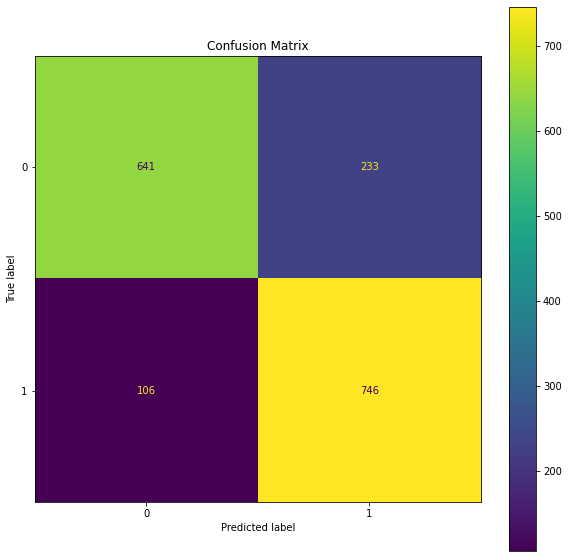

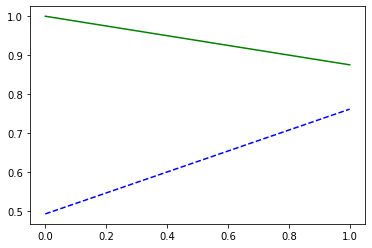

############################################################
Confusion matrix - Test : 
 [[225 134]
 [ 74 307]]
Overall Accuracy - Test : 0.7189189189189189
AUC - Test: 0.7894303950167788
f1-Score - Train: [0.68389058 0.74695864]


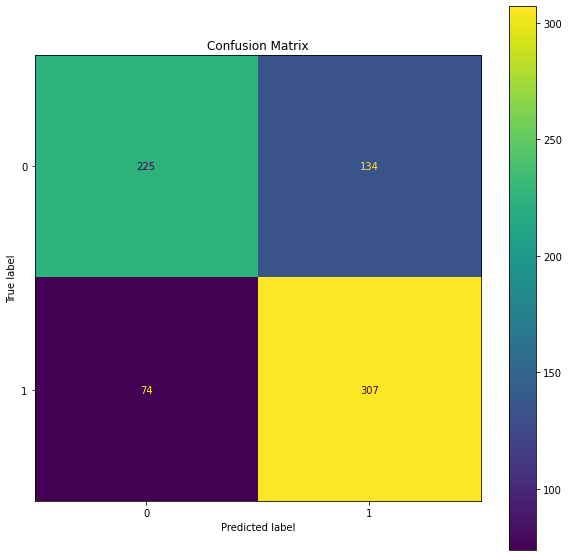

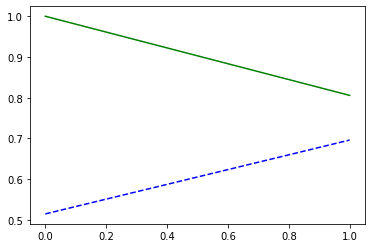

############################################################
Cross Val Scores
65.03984796018145
Bias Error    : 34.96015203981855
Variance Error: 1.7475077021619496


Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.63      0.68       359
           1       0.70      0.81      0.75       381

    accuracy                           0.72       740
   macro avg       0.72      0.72      0.72       740
weighted avg       0.72      0.72      0.72       740



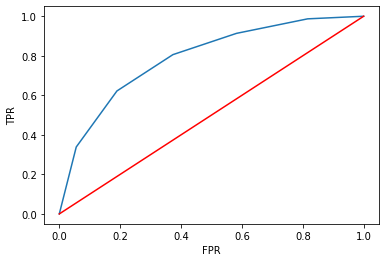

In [ ]:
knn = KNeighborsClassifier()
model_evaluation(knn,hr_X_train,hr_Y_train, hr_X_test, hr_Y_test)

# MNB classifier

Confusion matrix - Train : 
 [[430 444]
 [162 690]]
Overall Accuracy - Train : 0.6488991888760139
AUC - Train: 0.7735104371461415
f1-Score - Train: [0.58663029 0.69486405]


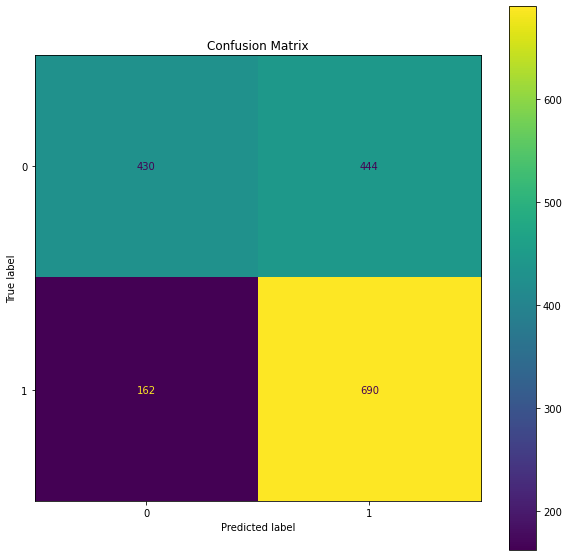

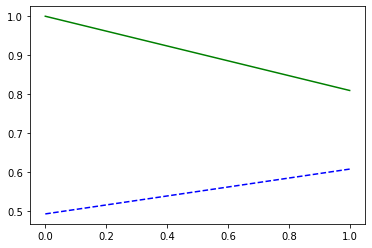

############################################################
Confusion matrix - Test : 
 [[168 191]
 [ 86 295]]
Overall Accuracy - Test : 0.6256756756756757
AUC - Test: 0.7424129435074097
f1-Score - Train: [0.54812398 0.6805075 ]


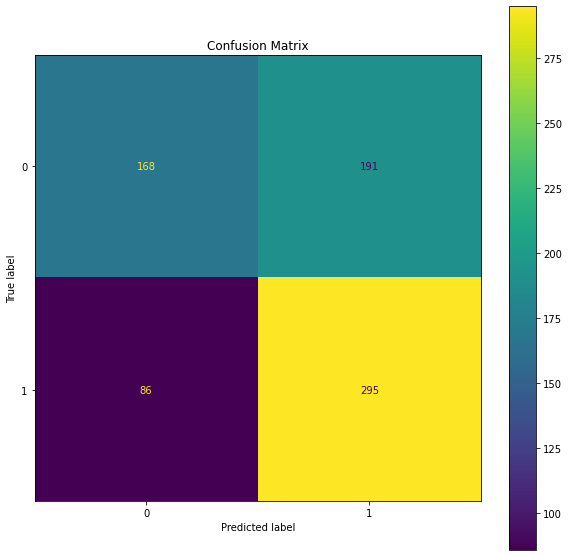

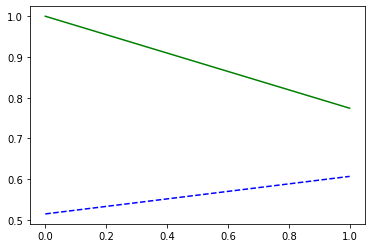

############################################################
Cross Val Scores
78.1832601807127
Bias Error    : 21.816739819287307
Variance Error: 4.52249853993628


Classification Report:
               precision    recall  f1-score   support

           0       0.66      0.47      0.55       359
           1       0.61      0.77      0.68       381

    accuracy                           0.63       740
   macro avg       0.63      0.62      0.61       740
weighted avg       0.63      0.63      0.62       740



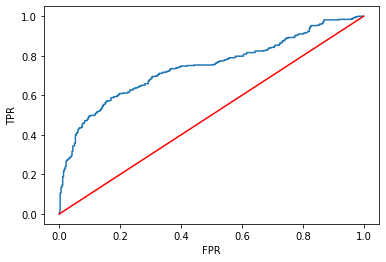

In [ ]:
mnb= MultinomialNB()
model_evaluation(mnb,hr_X_train,hr_Y_train, hr_X_test, hr_Y_test)

Confusion matrix - Train : 
 [[760 114]
 [158 694]]
Overall Accuracy - Train : 0.8424101969872537
AUC - Train: 0.909320914042608
f1-Score - Train: [0.84821429 0.83614458]


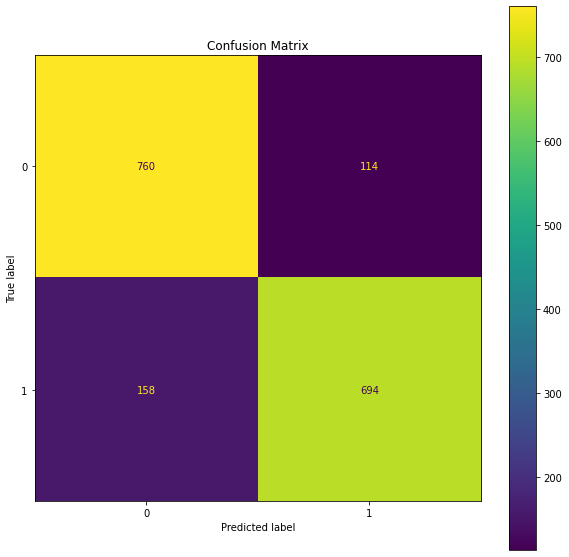

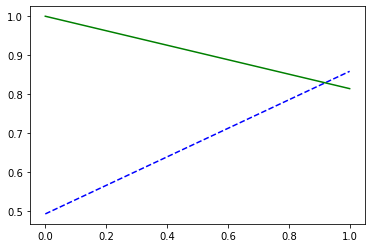

############################################################
Confusion matrix - Test : 
 [[304  55]
 [ 73 308]]
Overall Accuracy - Test : 0.827027027027027
AUC - Test: 0.9078879067693141
f1-Score - Train: [0.82608696 0.82795699]


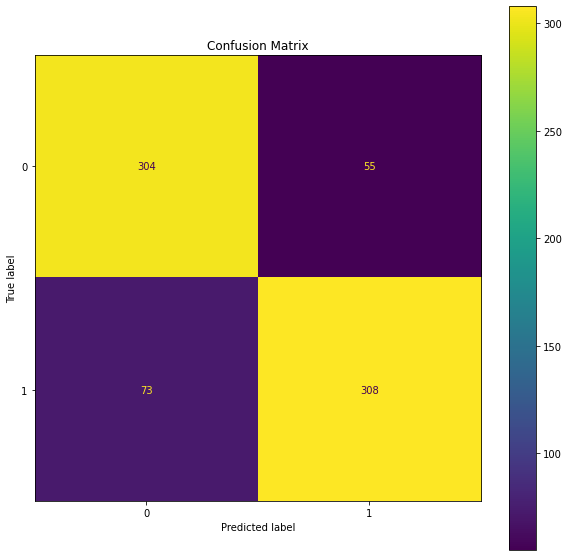

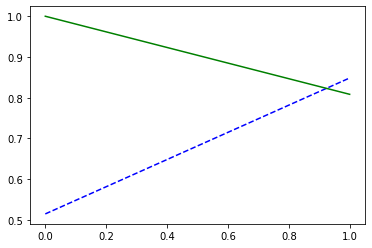

############################################################
Cross Val Scores
89.98441371299177
Bias Error    : 10.015586287008233
Variance Error: 4.093564790365276


Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.85      0.83       359
           1       0.85      0.81      0.83       381

    accuracy                           0.83       740
   macro avg       0.83      0.83      0.83       740
weighted avg       0.83      0.83      0.83       740



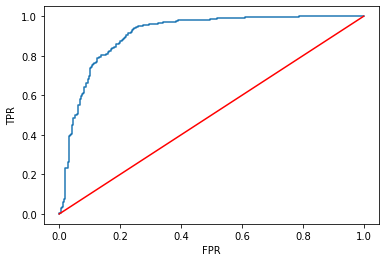

In [ ]:
logreg_model = LogisticRegression(random_state=50)

model_evaluation(logreg_model,hr_X_train,hr_Y_train, hr_X_test, hr_Y_test)